In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def equation_to_fit(x, basal, maximal, Kd, n):
    return basal + maximal * (x**n / (Kd + x**n))

def log_equation_to_fit(x, basal, maximal, Kd, n):
    return np.log10(equation_to_fit(x, basal, maximal, Kd, n))
# Unfortunately this is a necessary hack because the curve_fit function doesn't allow you to input function(function)

list_of_params_to_fit = ['Basal', 'Max', 'Kd', 'n']

In [3]:
def report_paramaters(fit_param_names, fit_param_values, fit_param_stdevs):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is', fit_param_values[each], 'with a standard deviation of', fit_param_stdevs[each])

In [4]:
# Use this cell to make fake replicates if you want to practice or something
'''Let us make some fake replicates'''
'''
replicates_to_make = 8
for i in range(0, replicates_to_make):
    noise_factor = np.random.randn()*0.1
    new_fake_y_name = 'replicate' + str(i)
    MyData[new_fake_y_name] = MyData.iloc[:,1] + noise_factor*MyData.iloc[:,1]
MyData['replicate4'] = MyData.iloc[:,1] + 0.5*MyData.iloc[:,1]
MyData
'''
True;

In [5]:
# if you have some replicates with different X values, or missing Y values for a given X value
# example:
# X  Y1    X  Y2    X  Y3
# 1  4     1  4     2  5
# 2  8     3  7     3  8
# 3  9     4  8     4  9
# 4  9     5  10    5  10
# Then you can use this code below:
# Does not weigh according to N, assumes all data sets have roughly same predictive power!
path = "/Users/Nicholas DeLateur/JupyterNotebooks/Curve Fitting/HillTestData_multiX.xlsx"
MyData = pd.read_excel(path)
######################## Some reminders ####################################
# MyData                                    # Shows the entire dataframe
# MyData.x                                  # Data of column called "x"
# MyData.iloc[0,:]                          # First row
# MyData.iloc[:,0]                          # First column
# MyData.columns[0]                         # Name of first column
# MyData['Seconds'] = 3600 * MyData.Hours   # Create a new column named as such and caluclated as such

n_replicates = MyData.shape[1] // 2

total_x_data = pd.DataFrame()
total_y_data = pd.DataFrame()
for i in range(0,n_replicates*2):
    if i%2==0:
        total_x_data = pd.Series.append(total_x_data, MyData.iloc[:,i])
        total_y_data = pd.Series.append(total_y_data, MyData.iloc[:,i+1])
        i=+1

x = total_x_data.iloc[:,0]
y = total_y_data.iloc[:,0]

In [6]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [100, 100, 100, 2]
low_bounds = [0, 0, 0, 0]
up_bounds = [1000000, 1000000, 1000000, 10]

fit_params, covar = curve_fit(log_equation_to_fit, x, np.log10(y), p0 = init_guess, bounds=(low_bounds, up_bounds))
# Fitting the log of the data to the log of the equation removes bias towards the high points by the residuals
# Treats the data more equally; allow accurate basal parameter estimation with minimal loss of accuracy of the maximal expression

std_dev_error_of_fit_params = np.sqrt(np.diag(covar))
report_paramaters(list_of_params_to_fit, fit_params, std_dev_error_of_fit_params)

Basal is 2.91892781304 with a standard deviation of 0.151828656444
Max is 1674.68016915 with a standard deviation of 45.525411346
Kd is 33.3810777583 with a standard deviation of 1.48359187301
n is 1.20234987823 with a standard deviation of 0.02361999845


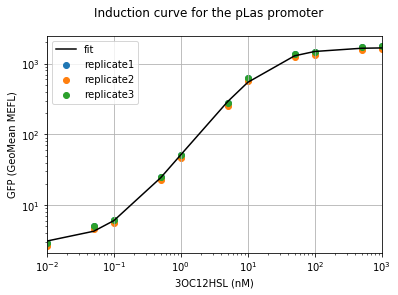

In [10]:
#plt.scatter(x, y, c='b', label='Data')
#plt.figure(figsize=(8,6))
for i in range(0, n_replicates*2):
    if i%2==0:
        j = i+1
        plt.scatter(MyData.iloc[:,i], MyData.iloc[:,j])
    
plt.plot(MyData.iloc[:,0], equation_to_fit(MyData.iloc[:,0], *fit_params), c='black', label='fit')
plt.xlabel('3OC12HSL (nM)')
plt.ylabel('GFP (GeoMean MEFL)')
plt.suptitle('Induction curve for the pLas promoter', fontsize=12)
plt.legend(loc = 'best')
plt.xscale('log')
plt.xlim(0.01, 1000)
plt.yscale('log')
plt.grid()
plt.savefig('pLasInductionCurve.png', transparent=True, bbox_inches='tight')
plt.show()